## Decision trees are generally used for classification problems. But it can also be used for regression problems by grouping the dependent variable (continuous) into buckets. <code>DecisionTreeRegressor()</code> from the scikit-learn library helps us to use decision trees for regression problems. The implementation is similar to <code>DecisionTreeClassifier()</code>.

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>Here MEDV is the continuous dependent variable.

## Build a predictor for MEDV using decision tree algorithm.

## Measure the performance of the model using regression evaluation metrics.

## <font color = '#cc66ff'>Here we will use DecisionTreeRegressor which is a **non-parametric algorithm** which will not is based on any assumtion. So, like other algo.(Linear Regression) we don't have to check multi-colineaity , linear assumption


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data-files/Housing.csv')

In [3]:
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


### Let's check is there any NULL value present or not

In [11]:
df.isnull().sum()

 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00    0
dtype: int64

### We have to clean the data so that we can have 14 columns(features)

In [12]:
# Creating empty list for each column
CRIM, ZN, INDUS, CHAS, NOX , RM , AGE , DIS , RAD , TAX , PTRATIO , B , LSTAT , MEDV = [[] for i in range(14)] 

In [58]:
list_of_lists=[]
column_name = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [59]:
for each_row_val in df.values:
#     Making np.ndarray to list then converting it to string(str)
    each_row_val = str(each_row_val.tolist())
    each_row_val = each_row_val[1:-1]
#     Replaceing extra space with single space
    each_row_val = each_row_val.replace("   "," ")
    each_row_val = each_row_val.replace("  "," ")
#     Let's split the each_row_val with by single space and made a list 
    each_row_val = each_row_val.split(' ')
#     Removing 1st element from the list because it's containing this(')
    each_row_val = each_row_val[1:]
#    this list_ will contain 14  values which is needed for 14 columns
    list_=[]
    for i in each_row_val:
        i = i.replace("'" , "")
        i = i.replace('"',"")
        i=float(i)
        list_.append(i)
    list_of_lists.append(list_)

In [60]:
df = pd.DataFrame( data = list_of_lists ,
                 columns=column_name)

In [61]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


#### Now our data is cleaned 😌 
#### Let's check the no of null values & datatype

In [62]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [103]:
df.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV       54
dtype: int64

### As we can see this MEDV column contains 54 null values.So,let's drop th ose rows which is containig null values

In [106]:
print(f"Before dropping the null values the shape of the df was {df.shape}")
df.dropna(subset = ['MEDV'] , inplace = True)
print(f"After dropping the null values the shape of the df was {df.shape}")

Before dropping the null values the shape of the df was (505, 14)
After dropping the null values the shape of the df was (451, 14)


In [108]:
print(f"As you can see we have successfully removed {505-451} observations")

As you can see we have successfully removed 54 observations


In [109]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,0.142874,0.127095,0.372120,0.077605,0.022492,0.028848,0.651627,0.127408,0.010283,0.517405,0.039700,0.931581,0.297620,23.749889
std,0.250616,0.243518,0.244924,0.267847,0.016447,0.006921,0.284821,0.091507,0.011346,0.219234,0.005575,0.173026,0.188364,8.818376
min,0.000909,0.000000,0.016583,0.000000,0.000000,0.000000,0.017833,0.000000,0.000000,0.241459,0.025361,0.000000,0.000000,6.300000
25%,0.007041,0.000000,0.177722,0.000000,0.008949,0.024528,0.401192,0.053550,0.004511,0.371019,0.036013,0.951599,0.149174,18.500000
50%,0.019197,0.000000,0.293439,0.000000,0.019197,0.027665,0.715768,0.105652,0.006015,0.415171,0.040578,0.987770,0.261016,21.900000
75%,0.121958,0.200000,0.652487,0.000000,0.031755,0.031875,0.915540,0.186770,0.009023,0.565721,0.044636,0.997983,0.409425,26.600000
max,1.000000,1.000000,1.000000,1.000000,0.070150,0.054117,1.000000,0.480835,0.034586,1.000000,0.049201,1.000000,1.000000,50.000000


### Let's seperate dependent & independent variable

In [110]:
# Here MEDV is the continuous dependent variable
y= df.MEDV
x = df.drop(columns=['MEDV'])

In [111]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.002740,0.0,0.254867,0.0,0.012125,0.029656,0.786573,0.167793,0.001504,0.321077,0.038549,1.000000,0.226744
1,0.002738,0.0,0.254867,0.0,0.012125,0.037578,0.606526,0.167793,0.001504,0.321077,0.038549,0.989737,0.070379
2,0.003248,0.0,0.078587,0.0,0.010537,0.035639,0.451767,0.215676,0.003008,0.292125,0.040832,0.994276,0.037026
3,0.006928,0.0,0.078587,0.0,0.010537,0.037184,0.536733,0.215676,0.003008,0.292125,0.040832,1.000000,0.110159
4,0.002995,0.0,0.078587,0.0,0.010537,0.029749,0.582250,0.215676,0.003008,0.292125,0.040832,0.992990,0.106487


In [112]:
y.head()

0    21.6
1    34.7
2    33.4
3    36.2
4    28.7
Name: MEDV, dtype: float64

### Let's do Feature Scaling(Normalizing)
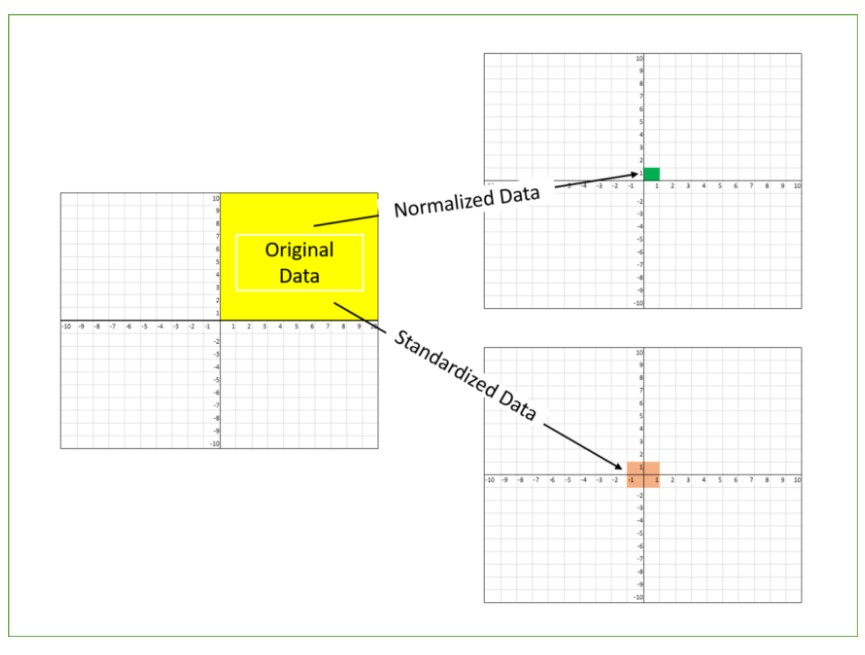

In [113]:
from sklearn.preprocessing import MinMaxScaler

In [114]:
scaler = MinMaxScaler(feature_range = (0 , 1))

In [115]:
print(x.head(2))
print('*'*50,'\n')
print(y.head())

       CRIM   ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.002740  0.0  0.254867   0.0  0.012125  0.029656  0.786573  0.167793   
1  0.002738  0.0  0.254867   0.0  0.012125  0.037578  0.606526  0.167793   

        RAD       TAX   PTRATIO         B     LSTAT  
0  0.001504  0.321077  0.038549  1.000000  0.226744  
1  0.001504  0.321077  0.038549  0.989737  0.070379  
************************************************** 

0    21.6
1    34.7
2    33.4
3    36.2
4    28.7
Name: MEDV, dtype: float64


In [116]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [117]:
x_norm = scaler.fit_transform(x)

In [118]:
column_except_medv = list(df.columns) 
column_except_medv.remove("MEDV")
column_except_medv

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

#### Let's put the normalized val;ue to the dependent columns

In [119]:
df[column_except_medv] = x_norm

In [120]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,0.142094,0.127095,0.361533,0.077605,0.320621,0.533057,0.645301,0.264972,0.297310,0.363784,0.601453,0.931581,0.297620,23.749889
std,0.250844,0.243518,0.249054,0.267847,0.234449,0.127890,0.289992,0.190309,0.328044,0.289021,0.233842,0.173026,0.188364,8.818376
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.300000
25%,0.006138,0.000000,0.163856,0.000000,0.127572,0.453248,0.390319,0.111368,0.130435,0.170802,0.446809,0.951599,0.149174,18.500000
50%,0.018305,0.000000,0.281525,0.000000,0.273663,0.511209,0.710608,0.219726,0.173913,0.229008,0.638298,0.987770,0.261016,21.900000
75%,0.121159,0.200000,0.646628,0.000000,0.452675,0.589002,0.914006,0.388428,0.260870,0.427481,0.808511,0.997983,0.409425,26.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000


In [121]:
x = x_norm

### Let's split the data into 80:20 ratio

In [122]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state = 10)

In [123]:
print(f"Shape of x_train is {x_train.shape}")
print(f"Shape of x_test is {x_test.shape}")

print(f"Shape of y_train is {y_train.shape}")
print(f"Shape of y_test is {y_test.shape}")

Shape of x_train is (360, 13)
Shape of x_test is (91, 13)
Shape of y_train is (360,)
Shape of y_test is (91,)


### Let's import DecisionTreeRegressor

In [124]:
from sklearn.tree import DecisionTreeRegressor

In [125]:
model = DecisionTreeRegressor()

In [126]:
model.fit(x_train , y_train)

DecisionTreeRegressor()

In [127]:
y_pred = model.predict(x_test)

In [129]:
pd.DataFrame({"Y_Pred":y_pred , "Y_actual":y_test}).head(10)

,Y_Pred,Y_actual
300,23.9,22.0
43,24.7,21.2
211,19.4,22.4
188,37.3,34.9
129,23.0,19.2
238,24.5,23.3
88,32.7,28.7
174,31.5,29.4
294,23.9,28.6
230,37.2,31.7


In [130]:
model.score(x_test, y_test)

0.7999155270572401

In [132]:
model.score(x_train , y_train)

1.0

### Let's Import all the evaluation matrix

In [139]:
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [144]:
def print_metrics(actual, predicted):
    print('MSE is {}'.format(mean_squared_error(actual, predicted)))
    print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
    print('R2_Score is {}'.format(r2_score(actual, predicted)))
    print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
    print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))
  

In [145]:
# Training dataset metrics
print_metrics(y_train, model.predict(x_train))

MSE is 0.0
RMSE is 0.0
R2_Score is 1.0
MAE is 0.0
MAPE is 0.0


In [146]:
# Test dataset metrics
print_metrics(y_test, model.predict(x_test))

MSE is 13.639670329670327
RMSE is 3.693192430631029
R2_Score is 0.7999155270572401
MAE is 2.8780219780219785
MAPE is 13.51302048558772


* As you can see the model is not **tiny overfitted** *(training accuracy is 100% but testing accuracy is 79.99%*
* But r2_score is near 0.8 , that's a good sign

In [133]:
# Adjusted R2

def adjusted_r2(n, k, actual, predicted):
    return 1 - (((n-1)/(n-k-1))*(1-r2_score(actual, predicted)))

In [147]:
adjusted_r2(len(y_train) , len(df.columns)-1 , y_train, model.predict(x_train))

1.0

In [148]:
adjusted_r2(len(y_train) , len(df.columns)-1 , y_test, model.predict(x_test))

0.7923979023512983

#### Visualize the TREE

In [151]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

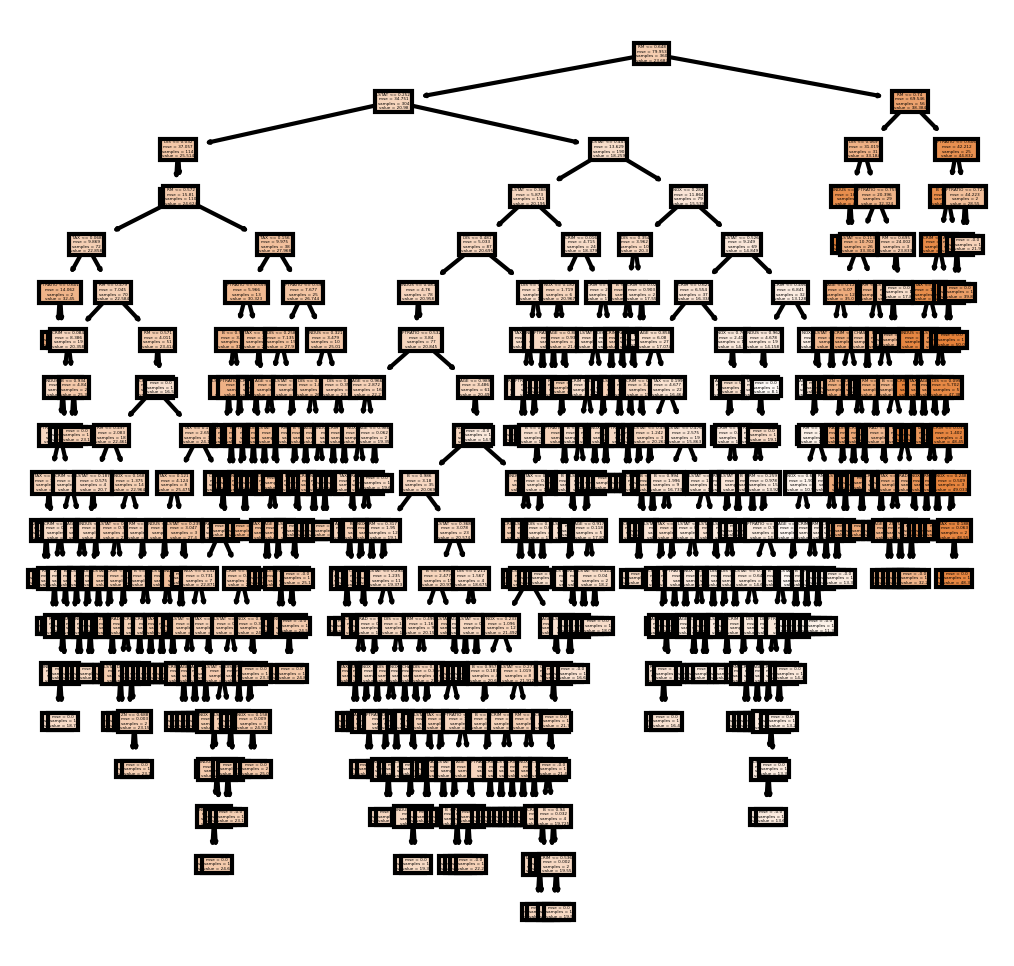

In [158]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
           feature_names = column_except_medv, 
           filled = True);
# Saving your plot if you want
fig.savefig('Image.jpg')

### Now will use GridSearchCv to find best parameters

In [162]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeRegressor()

# define grid search
HyperParameters = {"criterion":['mse' , "friedman_mse", "mae", "poisson"] , 
 "splitter" : ["best", "random"],
    "max_depth":[2,4,6,8]
}
cv = 5
grid_search = GridSearchCV(estimator=model, param_grid= HyperParameters, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit( x , y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.000000 using {'criterion': 'mse', 'max_depth': 2, 'splitter': 'best'}


In [163]:
grid_result.best_score_

0.0